<a href="https://colab.research.google.com/github/sungdk0822/ml/blob/main/sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

시작하기 전에 results.csv 파일의 20001번째 줄에 |가 하나 빠져 있는 것을 추가했습니다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import tensorflow as tf
from tensorflow.python.keras.utils.vis_utils import plot_model

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [9]:
img_path = 'drive/MyDrive/flickr30k_images/'

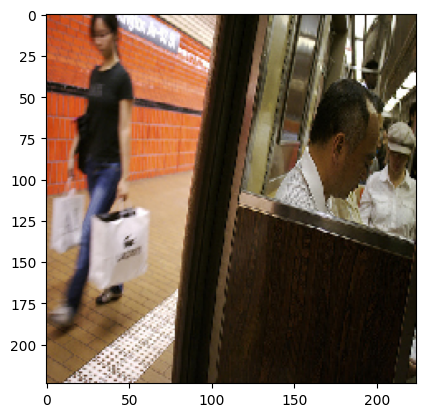

In [10]:
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
img = load_img(img_path+'1508599000.jpg', target_size=(224, 224), color_mode='rgb')
img = img_to_array(img)
img = img / 255
plt.imshow(img)

In [11]:
import pandas as pd
results = pd.read_csv(img_path+'results.csv', delimiter='|')
results.head()

,image_name,comment_number,comment
0,1000092795.jpg,0,Two young guys with shaggy hair look at their...
1,1000092795.jpg,1,"Two young , White males are outside near many..."
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .
3,1000092795.jpg,3,A man in a blue shirt standing in a garden .
4,1000092795.jpg,4,Two friends enjoy time spent together .


In [12]:
# https://keras.io/api/applications/ 에 있는 VGG16 코드를 가져와서 수정
from keras import models
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=True, input_shape=(224, 224, 3))
model.trainable = False

model = models.Sequential(model.layers[:-1])
model.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 25s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc2 (Dense)                          │ (None, 4096)                │      16,781,312 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 134,260,544 (512.16 MB)

In [13]:
num_all_samples = 31783
num_train_samples = 28 * 1024
num_val_samples = 1024
num_test_samples = 1024

In [ ]:
# from tqdm import tqdm
# import pickle

# img_features = []
# fnames = [results.loc[5*i]['image_name'] for i in range(num_all_samples)]
# for fname in tqdm(fnames):
#     img = load_img(img_path+fname, target_size=(224, 224))
#     x = img_to_array(img)
#     x = np.expand_dims(x, axis=0)
#     x = preprocess_input(x)
#     x = model.predict(x)
#     feature = x.flatten()
#     img_features.append(feature)

# with open(img_path+'img_features.pkl', 'wb') as f:
#     pickle.dump(img_features, f)

In [14]:
import pickle

with open(img_path+'img_features.pkl', 'rb') as g:
    img_features = pickle.load(g)
print(len(img_features))

31783


In [15]:
# 교재 11.4
import tensorflow as tf
from tensorflow.keras import layers
import string
import re

captions = ['[start] ' + results.loc[i][' comment'] + ' [end]' for i in range(0, 5*num_all_samples)]
vocab_size = 15000
sequence_length = 80

strip_chars = string.punctuation
strip_chars = strip_chars.replace("[", "")
strip_chars = strip_chars.replace("]", "")

def custom_standardization(input_string):
    lowercase = tf.strings.lower(input_string)
    return tf.strings.regex_replace(
        lowercase, f"[{re.escape(strip_chars)}]", "")

caption_vectorization = layers.TextVectorization(
    max_tokens=vocab_size,
    output_mode="int",
    output_sequence_length=sequence_length + 1,
    standardize=custom_standardization
)

caption_vectorization.adapt(captions)
caption_vectorization.vocabulary_size()

15000

In [25]:
# 교재 11.4
import numpy as np

batch_size = 64
pairs = []

for i in range(5*num_all_samples):
    pairs.append((img_features[i//5], captions[i]))

train_pairs = pairs[:num_train_samples]
val_pairs = pairs[num_train_samples:num_train_samples+num_val_samples]
test_pairs = pairs[num_train_samples+num_val_samples:num_train_samples+num_val_samples+num_test_samples]

def format_dataset(img_feature, caption):
    caption = caption_vectorization(caption)
    return ({
        "img_feature": img_feature,
        "caption": caption[:, :-1],
        "cell_state": tf.zeros([batch_size, 512], dtype=tf.float32),
        # "cell_state": tf.convert_to_tensor(np.zeros([batch_size, 512]).astype(np.float32))
    }, caption[:, 1:])

def make_dataset(pairs):
    img_features, captions = zip(*pairs)
    img_features = list(img_features)
    captions = list(captions)
    dataset = tf.data.Dataset.from_tensor_slices((img_features, captions))
    dataset = dataset.batch(batch_size)
    dataset = dataset.map(format_dataset, num_parallel_calls=4)
    return dataset.shuffle(2048).prefetch(16).cache()

train_ds = make_dataset(train_pairs)
val_ds = make_dataset(val_pairs)

In [26]:
for inputs, targets in train_ds.take(1):
    print(f"inputs['img_feature'].shape: {inputs['img_feature'].shape}")
    print(f"inputs['caption'].shape: {inputs['caption'].shape}")
    print(f"inputs['cell_state'].shape: {inputs['cell_state'].shape}")
    print(f"targets.shape: {targets.shape}")

inputs['img_feature'].shape: (64, 4096)
inputs['caption'].shape: (64, 80)
inputs['cell_state'].shape: (64, 512)
targets.shape: (64, 80)


In [ ]:
# # 교재 11.1
# vocabulary = text_vectorization.get_vocabulary()
# test_sentence = "I write, rewrite, and still rewrite again"
# encoded_sentence = text_vectorization(test_sentence)
# print(encoded_sentence)

In [ ]:
# # 교재 11.1
# inverse_vocab = dict(enumerate(vocabulary))
# decoded_sentence = " ".join(inverse_vocab[int(i)] for i in encoded_sentence)
# print(decoded_sentence)

i write [UNK] and still [UNK] again


In [ ]:
# from tqdm import tqdm
# caption_lengths = [len(text_vectorization(caption)) for caption in tqdm(dataset)]
# caption_lengths = np.array(caption_lengths)
# print(caption_lengths.max())
# print(caption_lengths.min())
# print(caption_lengths.mean())
# print(caption_lengths.std())

100%|██████████| 140000/140000 [06:41<00:00, 348.38it/s]

78
2
12.138857142857143
5.054518923796844


In [1]:
# 교재 11.4
from tensorflow import keras
from tensorflow.keras import layers

img_feature = keras.Input(shape=(4096,), dtype='float32', name='img_feature')
hidden_state = layers.Dense(512, activation='relu')(img_feature)

caption = keras.Input(shape=(None,), dtype="int64", name='caption')
y = layers.Embedding(input_dim=vocab_size, output_dim=512, mask_zero=True)(caption)

decoder_lstm = layers.LSTM(512, return_sequences=True)
cell_state = keras.Input(shape=(512,), dtype='float32', name='cell_state')
y = decoder_lstm(y, initial_state=[hidden_state, cell_state])
y = layers.Dropout(0.5)(y)
target_next_step = layers.Dense(vocab_size, activation="softmax")(y)

lstm = keras.Model(inputs=[img_feature, caption, cell_state], outputs=target_next_step)
lstm.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
lstm.summary()

KeyboardInterrupt: 

In [28]:
# 교재 7
from matplotlib import pyplot as plt
from IPython.display import clear_output
import pickle

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        if fit_mode == 'begin':
            self.per_epoch_train_losses = []
            self.per_epoch_train_accuracies = []
            self.per_epoch_val_losses = []
            self.per_epoch_val_accuracies = []
            self.previous_epochs = 0
        if fit_mode == 'continue':
            with open(img_path+'train_history.pkl', 'rb') as g:
                self.per_epoch_train_losses = pickle.load(g)
                self.per_epoch_train_accuracies = pickle.load(g)
                self.per_epoch_val_losses = pickle.load(g)
                self.per_epoch_val_accuracies = pickle.load(g)
                self.previous_epochs = len(self.per_epoch_train_losses)

    def on_epoch_end(self, epoch, logs):
        self.per_epoch_train_losses.append(logs.get("loss"))
        self.per_epoch_train_accuracies.append(logs.get("accuracy"))
        self.per_epoch_val_losses.append(logs.get("val_loss"))
        self.per_epoch_val_accuracies.append(logs.get("val_accuracy"))

        if epoch % 5 == 0 and epoch != 0:
            clear_output()
            plt.clf()

            plt.subplot(1, 2, 1)
            plt.plot(range(len(self.per_epoch_train_losses)), self.per_epoch_train_losses, label="Training")
            plt.plot(range(len(self.per_epoch_val_losses)), self.per_epoch_val_losses, label="Validation")
            plt.xlabel("Epoch")
            plt.ylabel("Loss")
            plt.legend()

            plt.subplot(1, 2, 2)
            plt.plot(range(len(self.per_epoch_train_accuracies)), self.per_epoch_train_accuracies, label="Training")
            plt.plot(range(len(self.per_epoch_val_accuracies)), self.per_epoch_val_accuracies, label="Validation")
            plt.xlabel("Epoch")
            plt.ylabel("Accuracy")
            plt.legend()

            plt.subplots_adjust(wspace=0.5)

            # plt.savefig(f"plot_at_epoch_{epoch}")
            plt.show()

    def on_train_end(self, logs):
        plt.clf()

        plt.subplot(1, 2, 1)
        plt.plot(range(len(self.per_epoch_train_losses)), self.per_epoch_train_losses, label="Training")
        plt.plot(range(len(self.per_epoch_val_losses)), self.per_epoch_val_losses, label="Validation")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(range(len(self.per_epoch_train_accuracies)), self.per_epoch_train_accuracies, label="Training")
        plt.plot(range(len(self.per_epoch_val_accuracies)), self.per_epoch_val_accuracies, label="Validation")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.legend()

        plt.subplots_adjust(wspace=0.5)

        plt.savefig(img_path+f"plot_at_epoch_{len(self.per_epoch_train_losses)}")

        with open(img_path+'train_history.pkl', 'wb') as f:
            pickle.dump(self.per_epoch_train_losses, f)
            pickle.dump(self.per_epoch_train_accuracies, f)
            pickle.dump(self.per_epoch_val_losses, f)
            pickle.dump(self.per_epoch_val_accuracies, f)



In [29]:
callbacks = [
    keras.callbacks.ModelCheckpoint(img_path+'vgg16Lstm.keras', save_best_only=False),
    LossHistory()
]

In [30]:
fit_mode = 'begin'

In [ ]:
fit_mode = 'continue'
lstm = keras.models.load_model(img_path+'vgg16Lstm.keras')

In [31]:
lstm.fit(train_ds, epochs=10, validation_data=val_ds, callbacks=callbacks)

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node functional_3_1/dense_4_1/MatMul defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-31-17c1db16b525>", line 1, in <cell line: 1>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 318, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 51, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py", line 882, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py", line 175, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/function.py", line 171, in _run_through_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py", line 556, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py", line 882, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py", line 144, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/numpy.py", line 3445, in matmul

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/numpy.py", line 477, in matmul

Detected at node functional_3_1/dense_4_1/MatMul defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-31-17c1db16b525>", line 1, in <cell line: 1>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 318, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 51, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py", line 882, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py", line 175, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/function.py", line 171, in _run_through_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py", line 556, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py", line 882, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py", line 144, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/numpy.py", line 3445, in matmul

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/numpy.py", line 477, in matmul

2 root error(s) found.
  (0) INVALID_ARGUMENT:  Matrix size-incompatible: In[0]: [64,80], In[1]: [4096,512]
	 [[{{node functional_3_1/dense_4_1/MatMul}}]]
	 [[StatefulPartitionedCall/rmsprop/cond/then/_30/rmsprop/cond/ScatterNd/ArithmeticOptimizer/ReorderCastLikeAndValuePreserving_int64_Cast/_38]]
  (1) INVALID_ARGUMENT:  Matrix size-incompatible: In[0]: [64,80], In[1]: [4096,512]
	 [[{{node functional_3_1/dense_4_1/MatMul}}]]
0 successful operations.
0 derived errors ignored. [Op:__inference_one_step_on_iterator_4925]

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np

vocab = caption_vectorization.get_vocabulary()
index_lookup = dict(zip(range(len(vocab)), vocab))
max_decoded_caption_length = 80

def decode_feature(img_feature):
    decoded_caption = "[start]"
    cell_state = tf.zeros([1, 512], dtype=tf.float32)
    for i in range(max_decoded_caption_length):
        tokenized_caption = caption_vectorization([decoded_caption])
        next_token_predictions = lstm.predict([img_feature, tokenized_caption, cell_state])
        sampled_token_index = np.argmax(next_token_predictions[0, i, :])
        sampled_token = index_lookup[sampled_token_index]
        decoded_caption += " " + sampled_token
        if sampled_token == "[end]":
            break
    return decoded_caption

def display(index):
    decoded_caption = decode_feature(tf.reshape(img_feature[index], [1, 4096]))
    img_file_name = results.iloc[5*index]['file_name']
    img = load_img(img_path+img_file_name, target_size=(224, 224), color_mode='rgb')
    img = img_to_array(img)
    img = img / 255
    plt.imshow(img)
    plt.title(decoded_caption)
    plt.axis('off')
    plt.show()

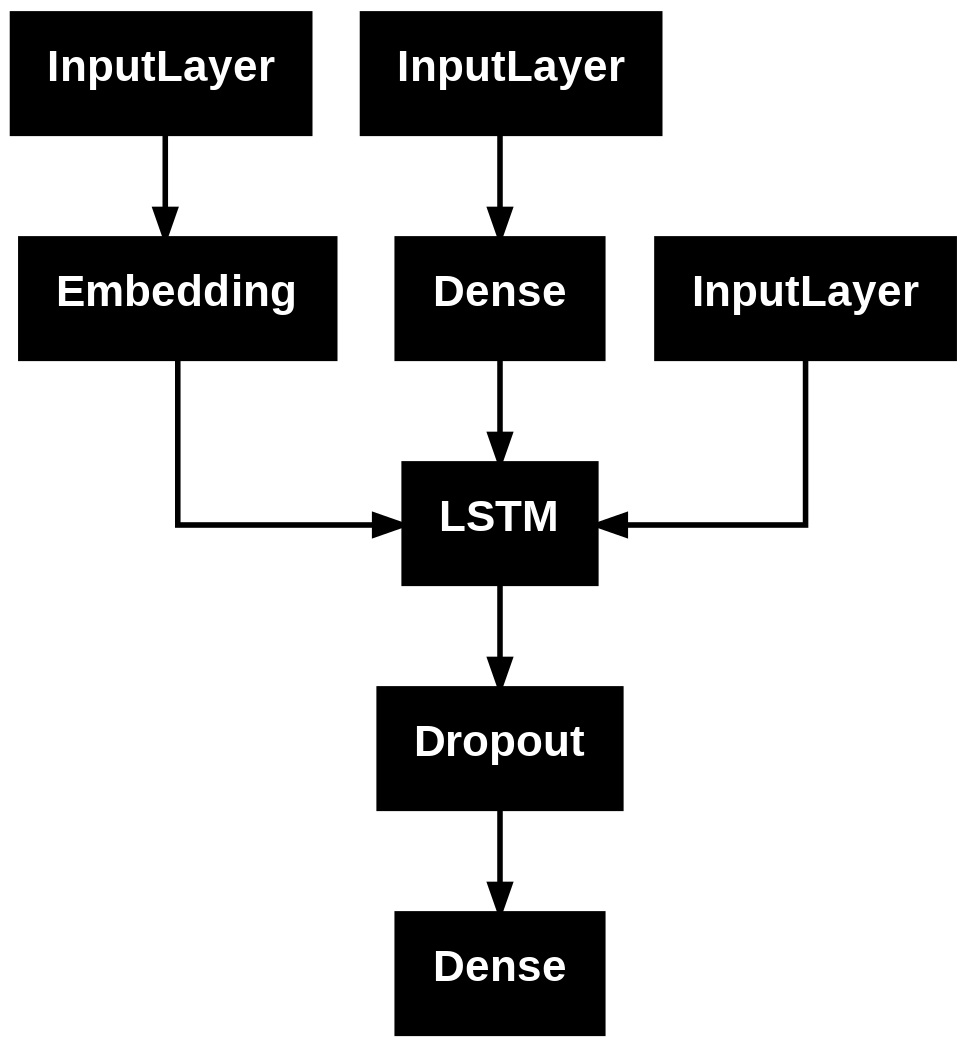

In [35]:
tf.keras.utils.plot_model(lstm)

In [ ]:
display(0)